In [1]:
# notebooks/01_exploration_dataset.ipynb

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset brut
column_names = ['unit', 'cycle',
                'op_setting_1', 'op_setting_2', 'op_setting_3'] + \
               [f'sensor_{i}' for i in range(1, 22)]

df = pd.read_csv('../data/raw/train_FD001.txt', sep=' ', header=None)
df.drop(columns=[26, 27], inplace=True)  # Colonnes vides
df.columns = column_names

# Aperçu du jeu de données
print("Dimensions :", df.shape)
df.head()


Dimensions : (20631, 26)


,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


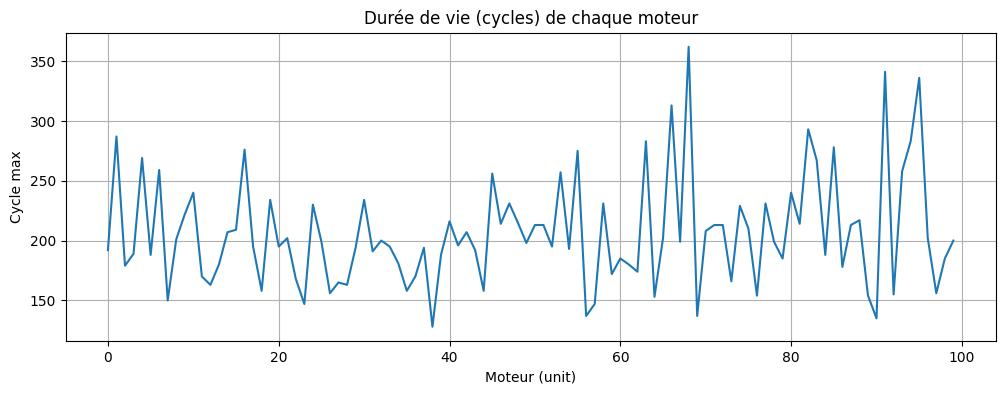

In [2]:
# Nombre de cycles par moteur
cycle_counts = df.groupby('unit')['cycle'].max()

plt.figure(figsize=(12, 4))
plt.plot(cycle_counts.values)
plt.title("Durée de vie (cycles) de chaque moteur")
plt.xlabel("Moteur (unit)")
plt.ylabel("Cycle max")
plt.grid(True)
plt.show()
